Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [172]:
df = pd.read_csv('/content/DataEngineer.csv')
df=df.replace({'Founded': {-1:''}, 'Industry': {'-1':''}, 'Sector': {'-1':'Other'}, 'Competitors': {'-1':''}, 'Easy Apply': {'-1':''}, 'Type of ownership': {'-1':'Unknown'}, 'Rating': {-1:0}})
df.head(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),,
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),,
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,,
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
5,Operations Engineer,$80K-$150K (Glassdoor est.),"Hi, we're Oscar. We're hiring an Operations En...",3.7,Oscar Health\n3.7,"New York, NY","New York, NY",1001 to 5000 employees,2012,Company - Private,Insurance Agencies & Brokerages,Insurance,$2 to $5 billion (USD),,True
6,Senior Data Engineer,$80K-$150K (Glassdoor est.),Senior Data Engineer\n\nMaster’s degree in Inf...,3.0,Affinity Solutions\n3.0,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",True
7,Data Engineer,$80K-$150K (Glassdoor est.),Our client is a leading hedge fund looking to ...,4.2,NJF Global Holdings\n4.2,"New York, NY","London, United Kingdom",51 to 200 employees,2003,Company - Private,Staffing & Outsourcing,Business Services,$10 to $25 million (USD),,True
8,Data Research Developer,$80K-$150K (Glassdoor est.),About Us\n\nTeza is a quantitative asset manag...,4.3,Teza Technologies\n4.3,"New York, NY","Chicago, IL",51 to 200 employees,2009,Company - Private,Financial Analytics & Research,Finance,Unknown / Non-Applicable,,
9,Data Engineer (Python),$80K-$150K (Glassdoor est.),What we're looking for\n\nWe are looking for a...,4.4,Conductor\n4.4,"New York, NY","New York, NY",201 to 500 employees,2010,Company - Private,Internet,Information Technology,$25 to $50 million (USD),"Brightedge Technologies, Moz, seoClarity",True


В графиках использовать основные цвета сайта hh.ru

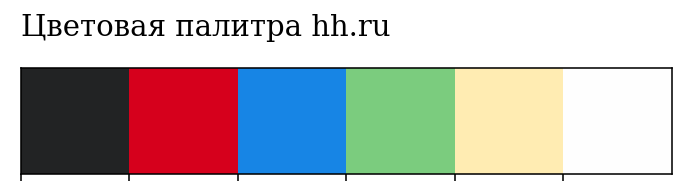

In [173]:
sns.palplot(['#222324', '#d6001c', '#1785e5', '#7bcc7e', '#ffecb2', '#fefefe'])
plt.title("Цветовая палитра hh.ru",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

Построить график компаний с самым большим кол-вом вакансий

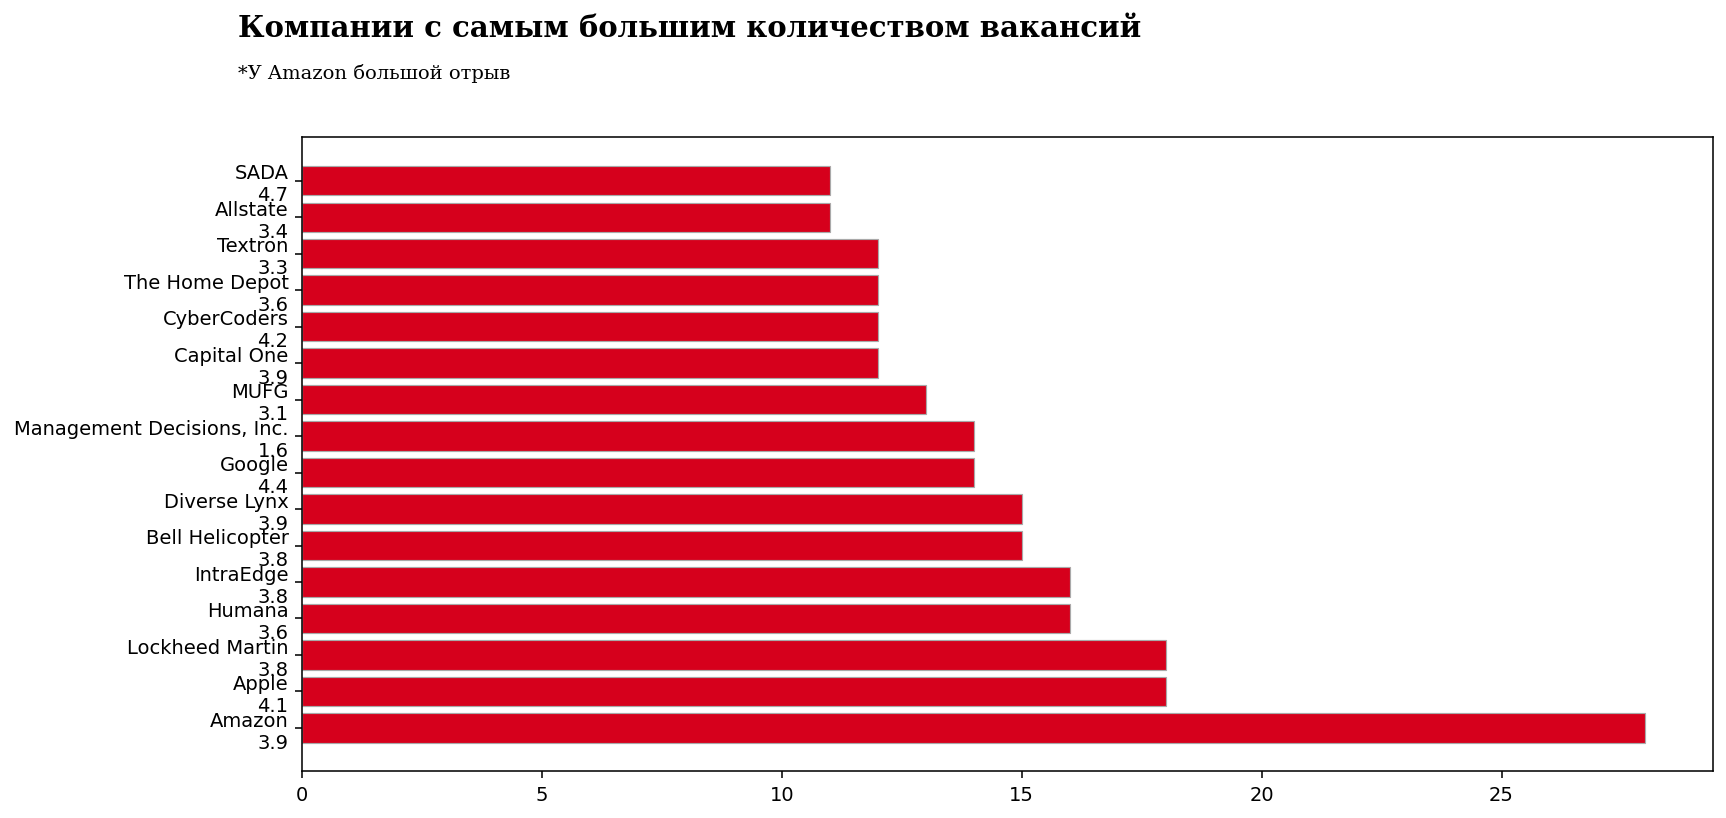

In [174]:
data= df.groupby('Company Name').count().sort_values(by='Job Title',ascending=False)[:16]
fig, ax = plt.subplots(1,1, figsize=(13, 6))
ax.barh(data.index, data["Job Title"], edgecolor='darkgray', linewidth=0.6, color='#d6001c')
fig.text(0.09, 1, 'Компании с самым большим количеством вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, '*У Amazon большой отрыв', fontsize=10, fontfamily='serif')
plt.show()

Построить график самых популярный названий в вакансиях

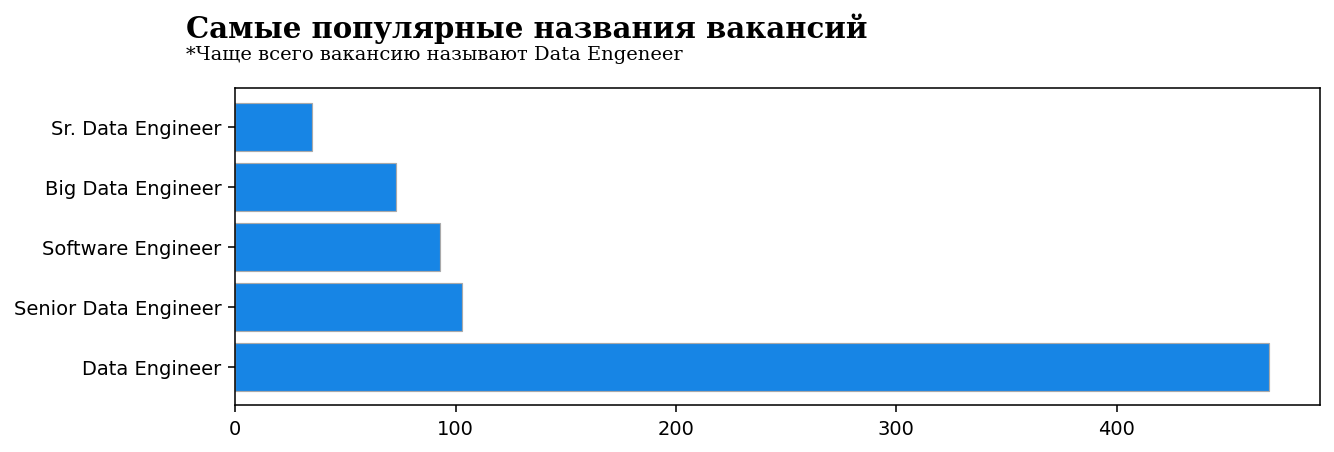

In [175]:
data1 = df.groupby('Job Title').count().sort_values(by='Salary Estimate',ascending=False)[:5]
fig, ax = plt.subplots(1,1, figsize=(10, 3))
ax.barh(data1.index, data1["Salary Estimate"], edgecolor='darkgray', linewidth=0.6, color='#1785e5')
fig.text(0.09, 1, 'Самые популярные названия вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, '*Чаще всего вакансию называют Data Engeneer', fontsize=10, fontfamily='serif')
plt.show()

Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

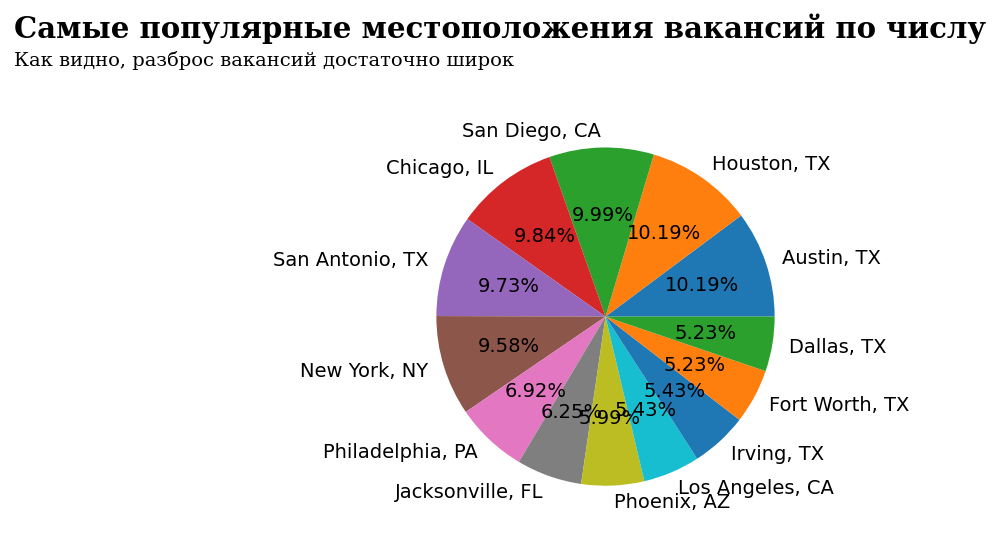

In [176]:
data2 = df.groupby('Location').count().sort_values(by='Salary Estimate',ascending=False)[:13]
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.pie(data2['Salary Estimate'], labels=data2.index, autopct='%1.2f%%')   
fig.text(0.09, 1, 'Самые популярные местоположения вакансий по числу', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Как видно, разброс вакансий достаточно широк', fontsize=10, fontfamily='serif')
plt.show()

Построить график популярности по колонке Type of ownership, относительно численности вакансий

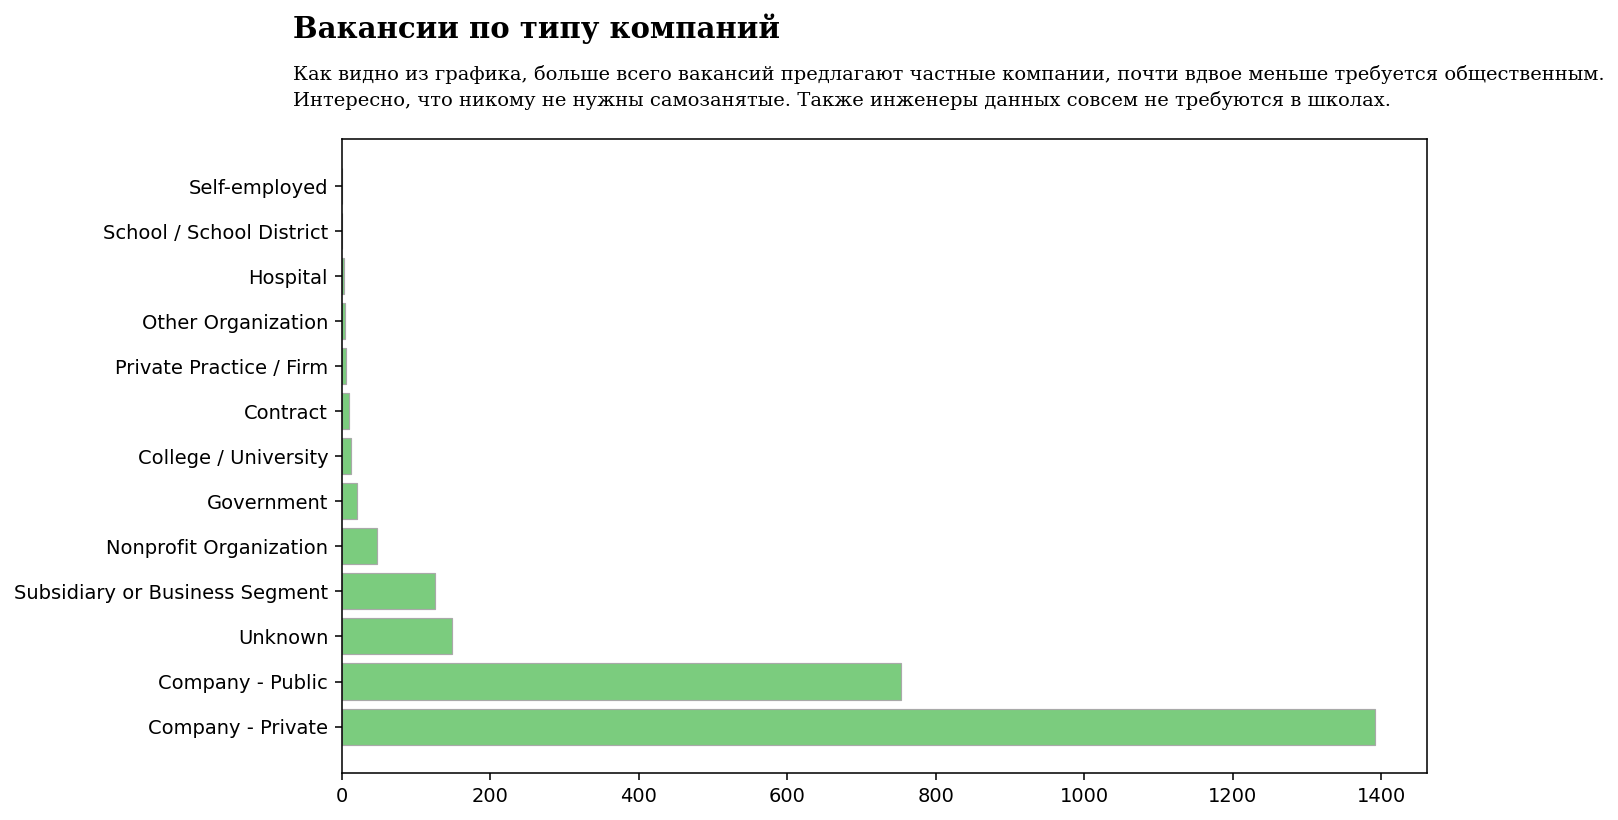

In [177]:
data3 = df.groupby('Type of ownership').count().sort_values(by='Salary Estimate',ascending=False)
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.barh(data3.index, data3["Job Title"], edgecolor='darkgray', linewidth=0.6, color='#7bcc7e')
fig.text(0.09, 1, 'Вакансии по типу компаний', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Как видно из графика, больше всего вакансий предлагают частные компании, почти вдвое меньше требуется общественным.', fontsize=10, fontfamily='serif')
fig.text(0.09, 0.92, 'Интересно, что никому не нужны самозанятые. Также инженеры данных совсем не требуются в школах.', fontsize=10, fontfamily='serif')
plt.show()

Построить график популярности по секторам работы

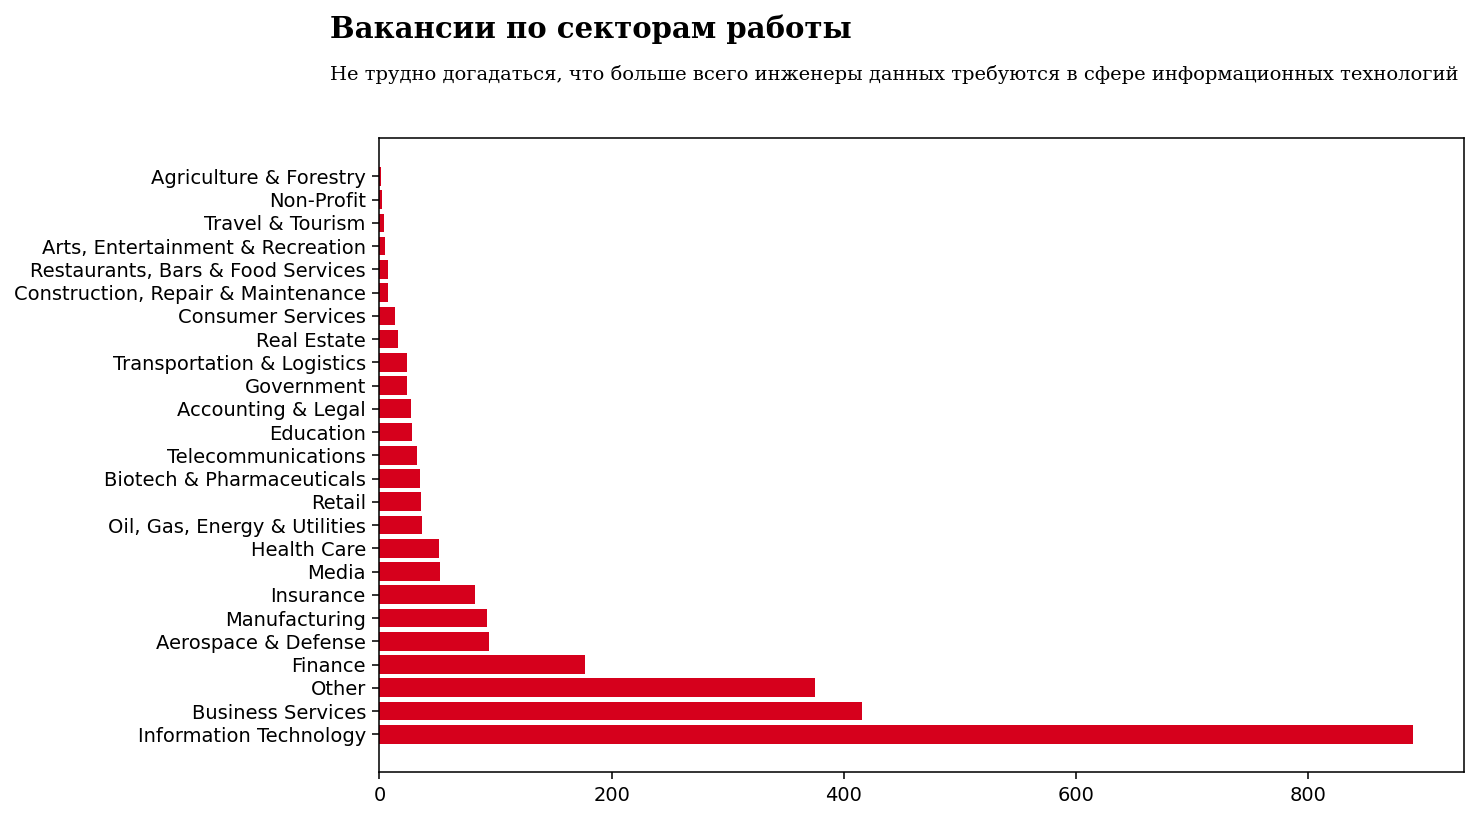

In [178]:
data4 = df.groupby('Sector').count().sort_values(by='Salary Estimate',ascending=False)
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.barh(data4.index, data4["Salary Estimate"], linewidth=2, color='#d6001c')
fig.text(0.09, 1, 'Вакансии по секторам работы', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Не трудно догадаться, что больше всего инженеры данных требуются в сфере информационных технологий', fontsize=10, fontfamily='serif')
plt.show()

Построить график используя сектора работы и средний уровень зарплат в них

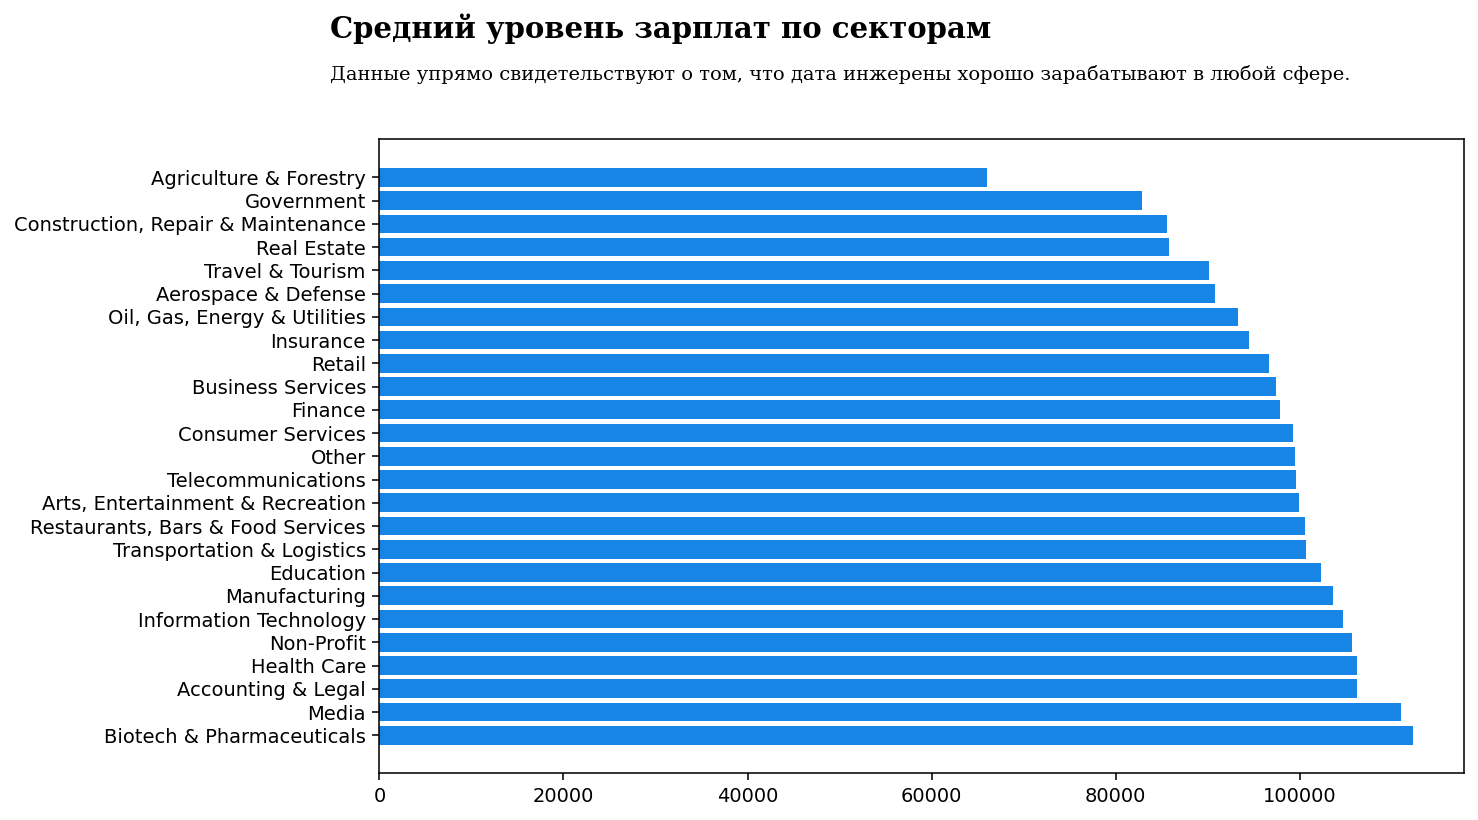

In [179]:
df = pd.read_csv('/content/DataEngineer.csv')
data5 = df
data5=data5.replace({'Sector': {'-1':'Other'}})
for i in range(len(data5)):
  if "$" in data5["Salary Estimate"][i]:
    data5["Salary Estimate"][i]=data5["Salary Estimate"][i].replace("$", "")
  if "K" in data5["Salary Estimate"][i]:
    data5["Salary Estimate"][i]=data5["Salary Estimate"][i].replace("K", "000")
  if "(Glassdoor est.)" in data5["Salary Estimate"][i]:
    data5["Salary Estimate"][i]=data5["Salary Estimate"][i].replace("(Glassdoor est.)", "")
  if "(Employer est.)" in data5["Salary Estimate"][i]:
    data5["Salary Estimate"][i]=data5["Salary Estimate"][i].replace("(Employer est.)", "")
  x=int(data5["Salary Estimate"][i].split("-")[0])
  y=int(data5["Salary Estimate"][i].split("-")[1])
  data5["Salary Estimate"][i]=(x+y)/2
res=round(data5.groupby(['Sector'])['Salary Estimate'].mean().reset_index(), 0)
res=res.sort_values(by='Salary Estimate',ascending=False)
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.barh(res['Sector'], res["Salary Estimate"], linewidth=2, color='#1785e5')
fig.text(0.09, 1, 'Средний уровень зарплат по секторам', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Данные упрямо свидетельствуют о том, что дата инжерены хорошо зарабатывают в любой сфере.', fontsize=10, fontfamily='serif')
plt.show()

Построить гистограмму распределения рейтинга компаний

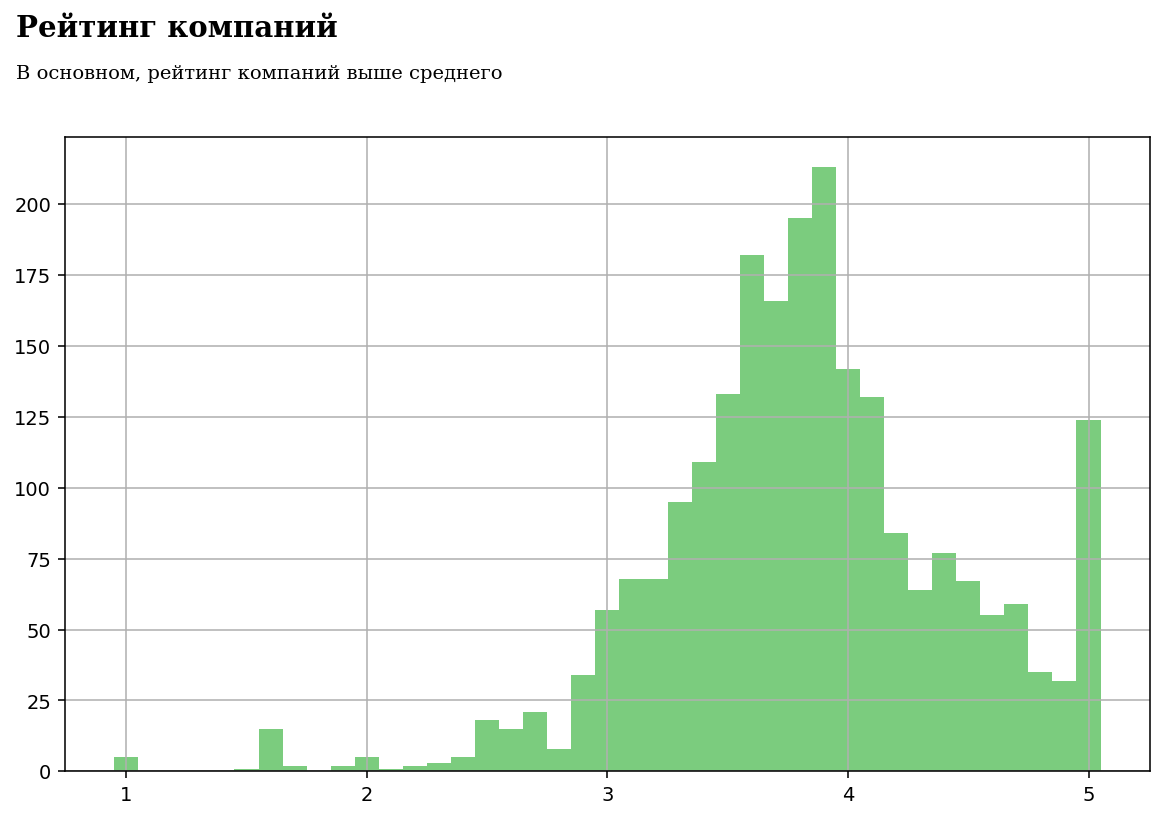

In [180]:
data6 = df[df['Rating'] >0]
data6 = data6.groupby('Rating').count().sort_values(by='Salary Estimate',ascending=False)
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(data6.index, data6["Salary Estimate"], linewidth=2, color='#7bcc7e', width=0.1)
ax.grid()
fig.text(0.09, 1, 'Рейтинг компаний', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'В основном, рейтинг компаний выше среднего', fontsize=10, fontfamily='serif')
plt.show()

Построить график средних зарплат по популярным компаниям

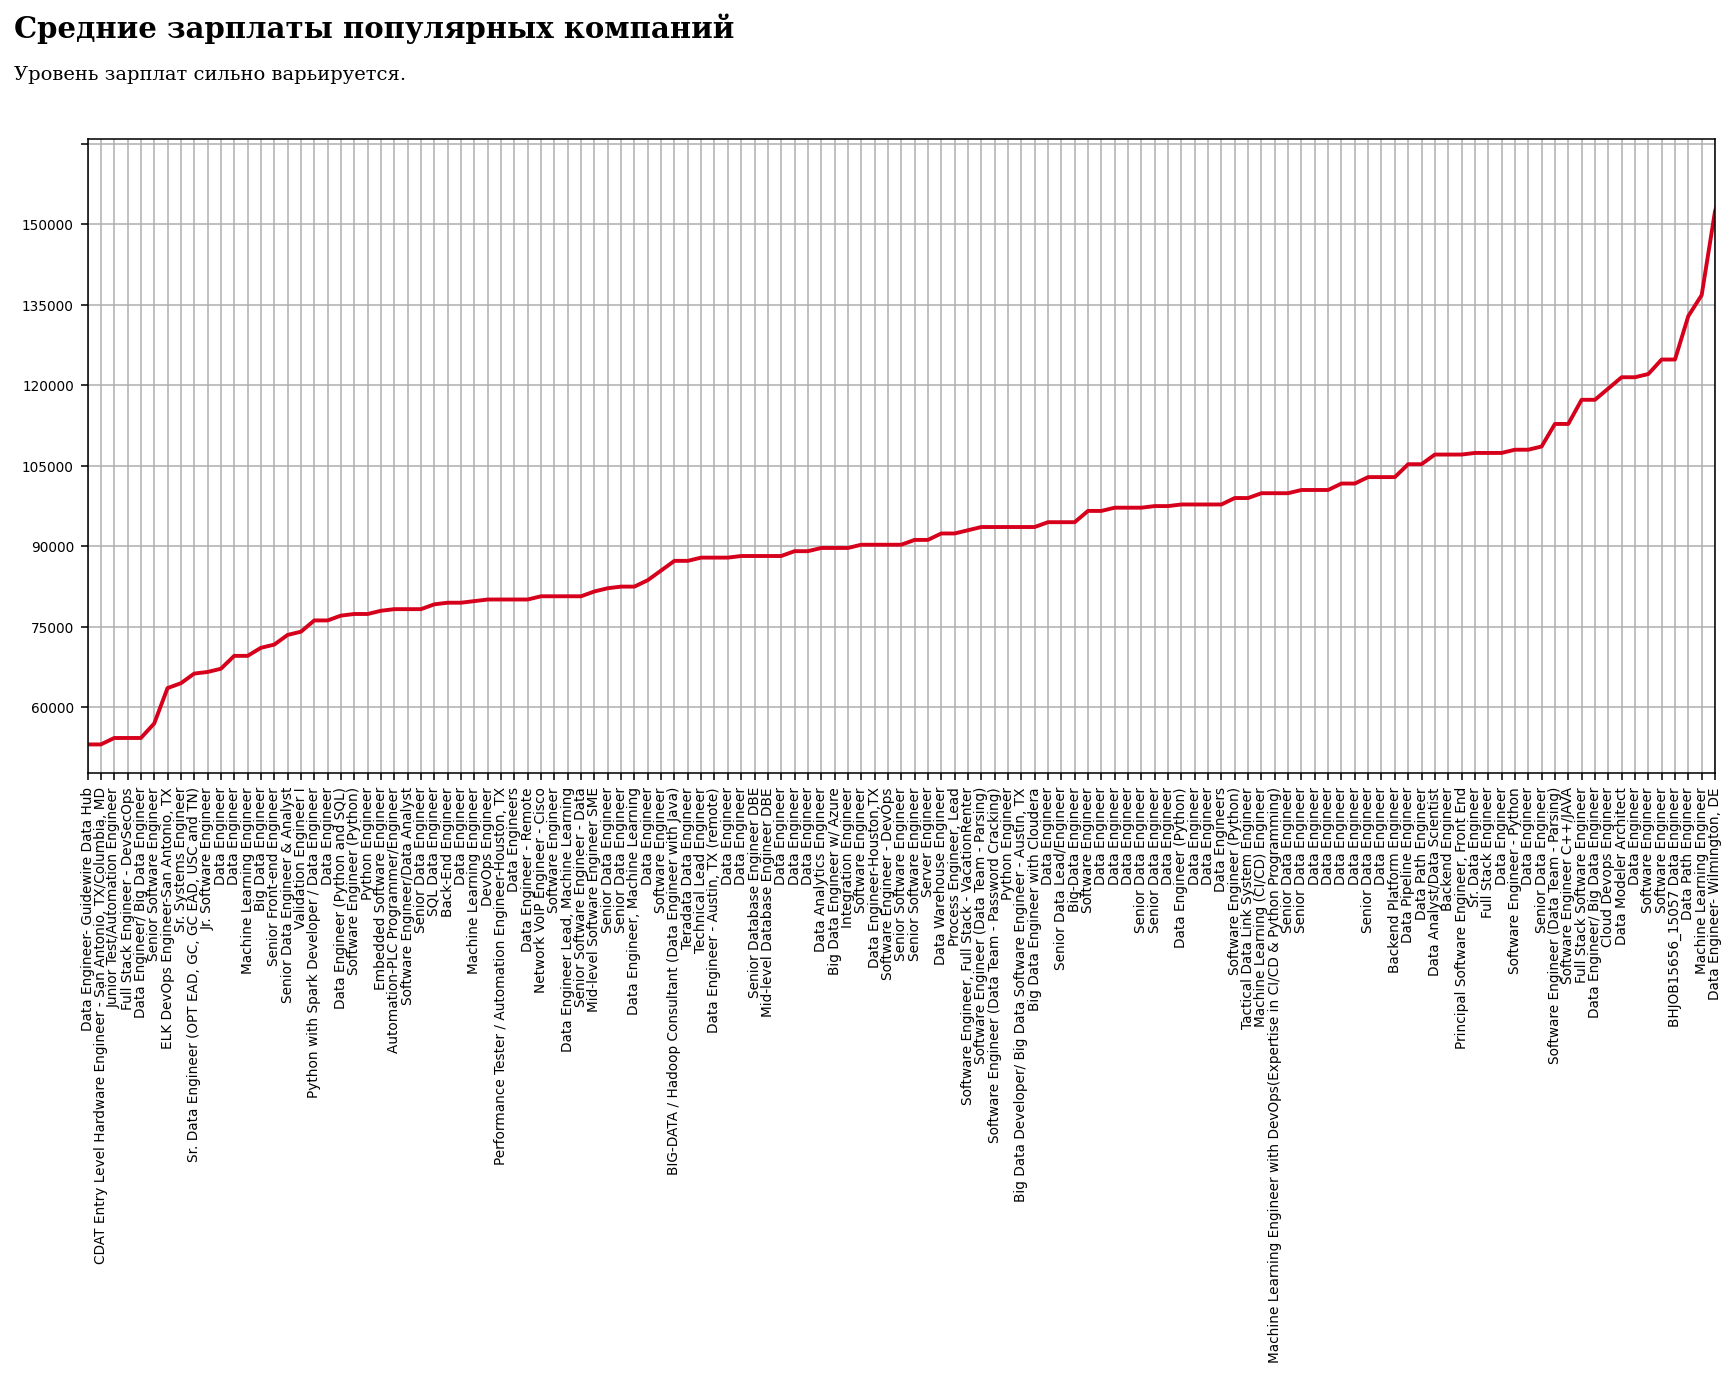

In [181]:
import matplotlib.ticker as ticker
df = pd.read_csv('/content/DataEngineer.csv')
data7 = df
for i in range(len(data7)):
  if "$" in data7["Salary Estimate"][i]:
    data7["Salary Estimate"][i]=data7["Salary Estimate"][i].replace("$", "")
  if "K" in data7["Salary Estimate"][i]:
    data7["Salary Estimate"][i]=data7["Salary Estimate"][i].replace("K", "000")
  if "(Glassdoor est.)" in data7["Salary Estimate"][i]:
    data7["Salary Estimate"][i]=data7["Salary Estimate"][i].replace("(Glassdoor est.)", "")
  if "(Employer est.)" in data7["Salary Estimate"][i]:
    data7["Salary Estimate"][i]=data7["Salary Estimate"][i].replace("(Employer est.)", "")
  x=int(data7["Salary Estimate"][i].split("-")[0])
  y=int(data7["Salary Estimate"][i].split("-")[1])
  data7["Salary Estimate"][i]=(x+y)/2
data7=df.loc[df['Rating'] == 5]
data7=data7.sort_values(by="Salary Estimate", ascending=True)
data7.reset_index(inplace=True, drop=True)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data7.reindex(data7["Job Title"])
ax.plot(data7.index, data7["Salary Estimate"], linewidth=2, color='#d6001c')
ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_ticklabels(data7["Job Title"], fontsize=7, rotation = 90)
ax.yaxis.set_ticklabels([45000, 60000, 75000, 90000, 105000, 120000, 135000, 150000], fontsize=7)
plt.xlim(0,122)
fig.text(0.09, 1, 'Средние зарплаты популярных компаний', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Уровень зарплат сильно варьируется.', fontsize=10, fontfamily='serif')
plt.show()

Построить описаний вакансий облако тегов, исследовать самые популярные слова

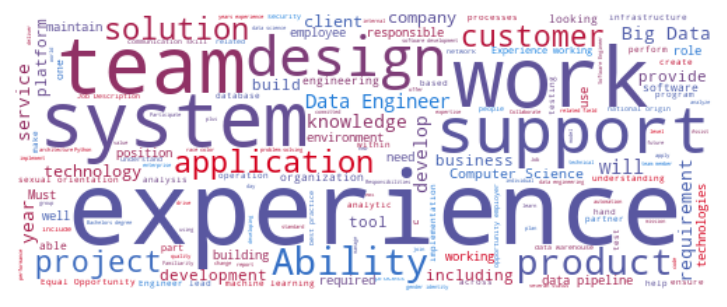

In [188]:
from pandas.core.describe import DataFrameDescriber
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#d6001c', '#1785e5'])
text = str(list(df['Job Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('&', '').replace('6+', '').replace('\\n', ' ')
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()